In [3]:
#Projet Meteo 
#Bac à sable Samuel

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [1]:
#Importation du fichier depuis répertoire local

from google.colab import files
data_to_load = files.upload()



Saving weatherAUS.csv to weatherAUS.csv


In [52]:
#Lecture du fichier depuis google collab

import io
df = pd.read_csv(io.BytesIO(data_to_load['weatherAUS.csv']))

In [40]:
#df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
# % de valeur nulle par attribut
df.isnull().sum()/len(df)*100

#Quelques valeurs nulles (jusqu'à 48%) Quelle méthode pour compléter ces valeurs ? On met la moyenne ou on supprime ?
#Notamment sur la variable cible

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [53]:
#On extrait le mois/ le jour de la date
df["month"] = pd.to_datetime(df["Date"]).dt.month
df["day"] = pd.to_datetime(df["Date"]).dt.day

In [46]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

la = LabelEncoder()
l = []
for i in df.columns:
    if df.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df[i] = la.fit_transform(df[i])





Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


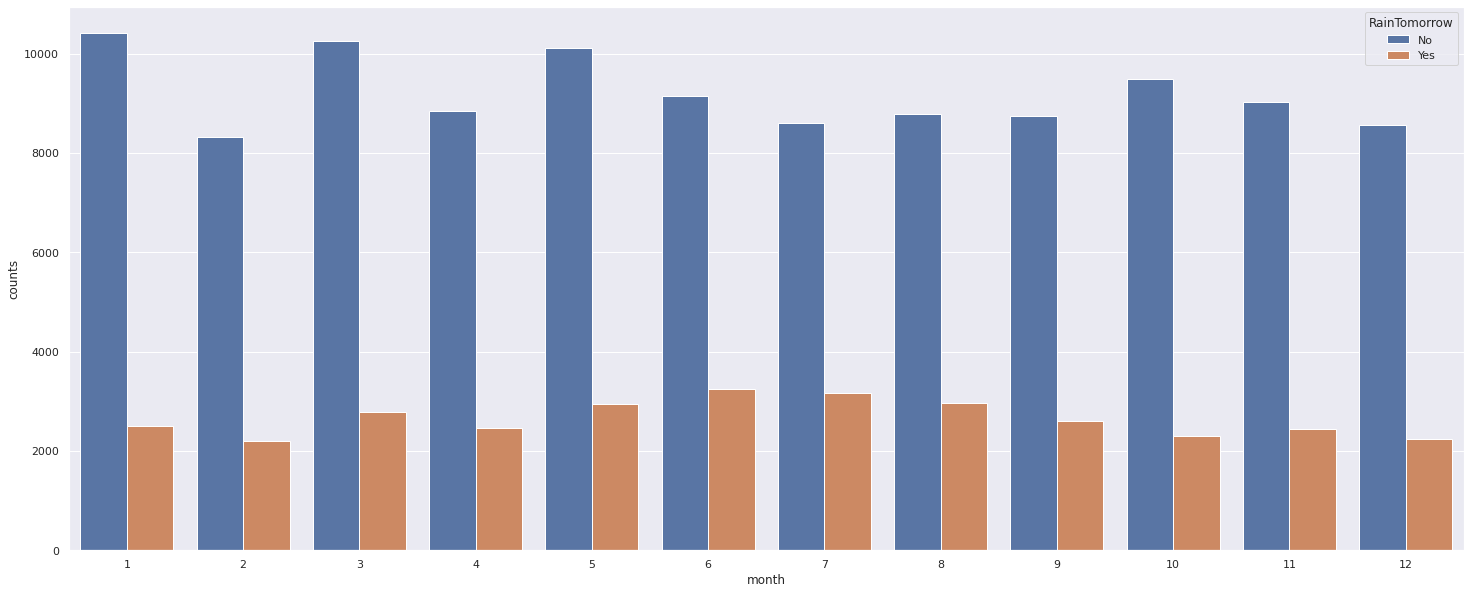

In [43]:
#Saisonnalité de la pluie (en nombre)

df_group=df.groupby(['month', 'RainTomorrow']).size().reset_index(name='counts')

plt.figure(figsize=(25,10))
sns.barplot(x='month', y='counts', data=df_group,hue="RainTomorrow")

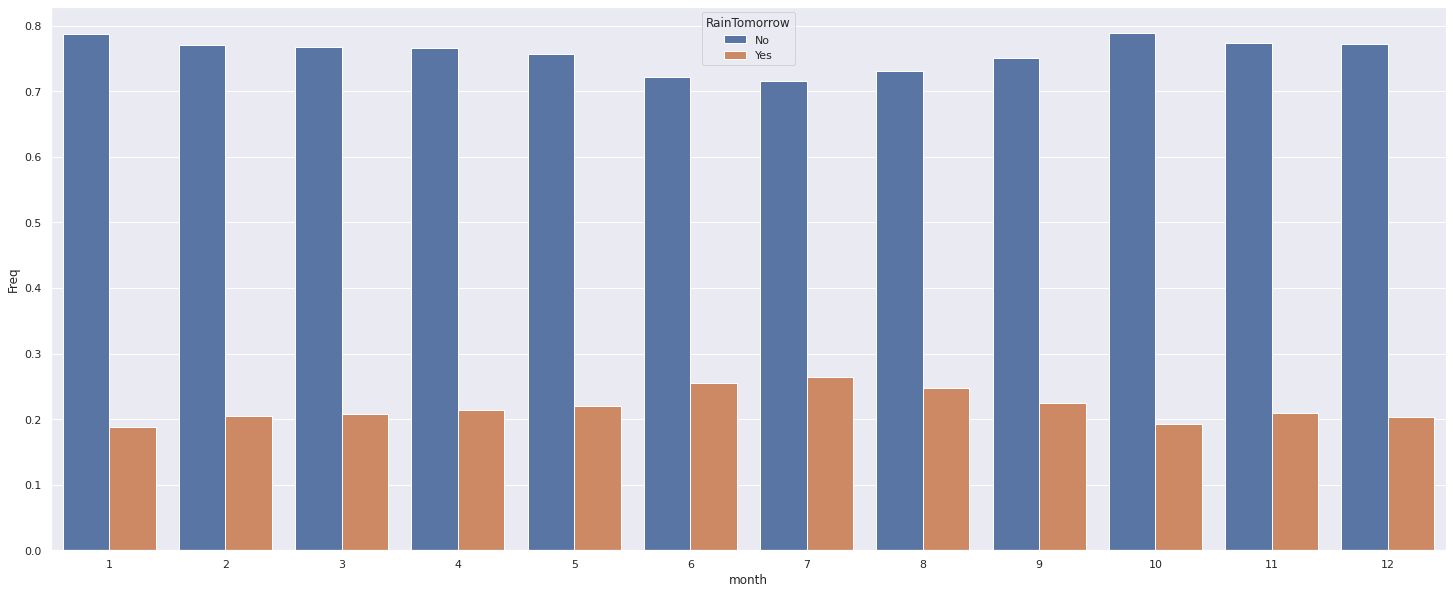

In [24]:
#Saisonnalité de la pluie (en fréquence par mois)

df_group2 = df.groupby(['month', 'RainTomorrow']).size().reset_index(name='counts')
s = df.month.value_counts()
df_group2['Freq'] = df_group2['counts'].div(df_group2['month'].map(s))


plt.figure(figsize=(25,10))
sns.barplot(x='month', y='Freq', data=df_group2,hue="RainTomorrow")

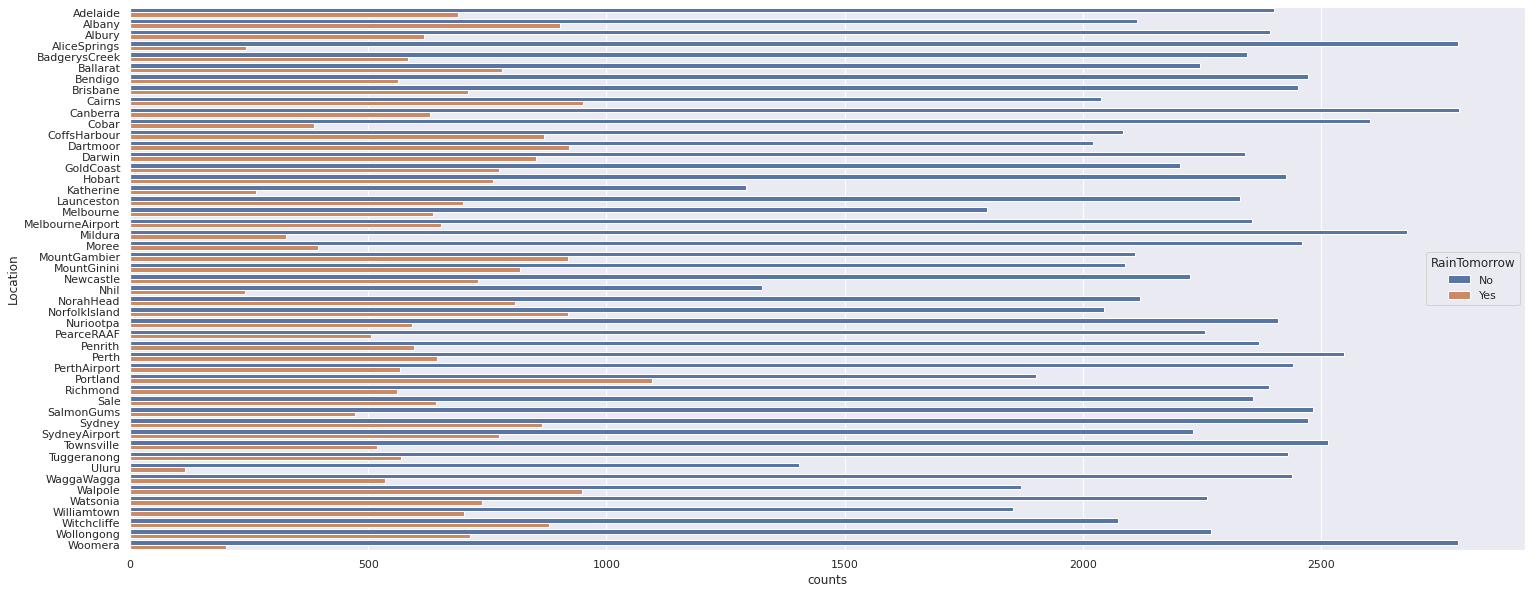

In [27]:
df_group=df.groupby(['Location', 'RainTomorrow']).size().reset_index(name='counts')
plt.figure(figsize=(25,10))
graph=sns.barplot(y='Location', x='counts', data=df_group,hue="RainTomorrow")


In [28]:
df['RainTomorrow'].value_counts(normalize=True)

# Déséquilibe entre les classes

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

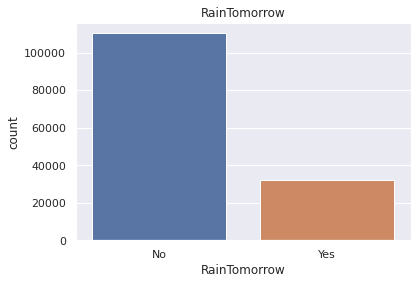

In [29]:
sns.countplot(df['RainTomorrow'])
plt.title('RainTomorrow')
plt.show()

#Les valeurs Null ne sont pas affichées (ils le sont en encodant)

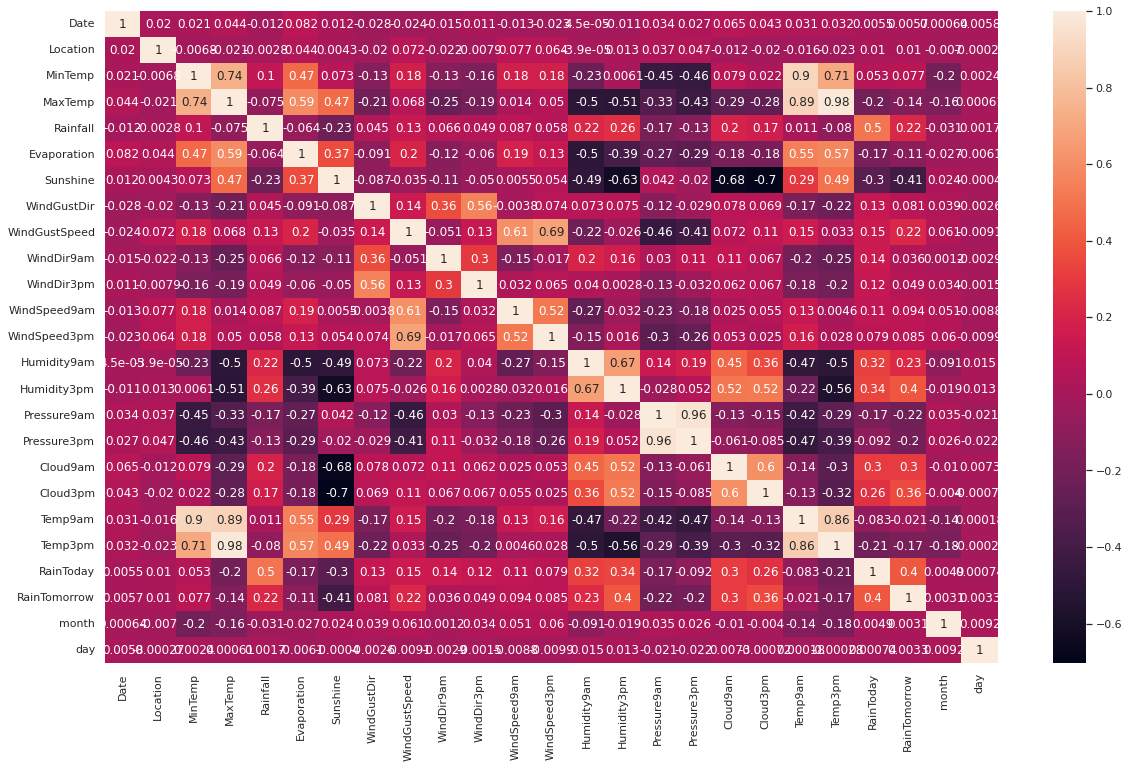

In [47]:
# Corrélation de Pearson pour les variables quantitatives

cor = df.corr(method='pearson')
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True)

In [48]:
cor['RainTomorrow'].sort_values(ascending = False)

# Il y a 10 paramètres avec une corrélation <10% (dont la date, qui est encodé brutalement, il faudrait tester avec le mois à mon avis)
# Evaporation a ~40% de valeurs manquantes mais est peu corrélées à la variable cible (A priori c'est physiquement faux)
# Sunshine, Cloud3PM, Cloud9AM ont ~40% de valeurs manquantes mais sont très corrélées à la variable cicles

RainTomorrow     1.000000
RainToday        0.404622
Humidity3pm      0.397160
Cloud3pm         0.356059
Cloud9am         0.301263
Humidity9am      0.230747
Rainfall         0.223487
WindGustSpeed    0.216463
WindSpeed9am     0.093878
WindSpeed3pm     0.084738
WindGustDir      0.081421
MinTemp          0.077324
WindDir3pm       0.049499
WindDir9am       0.035575
Location         0.010202
Date             0.005672
day              0.003344
month            0.003073
Temp9am         -0.020539
Evaporation     -0.105260
MaxTemp         -0.141733
Temp3pm         -0.169035
Pressure3pm     -0.197110
Pressure9am     -0.215554
Sunshine        -0.405503
Name: RainTomorrow, dtype: float64

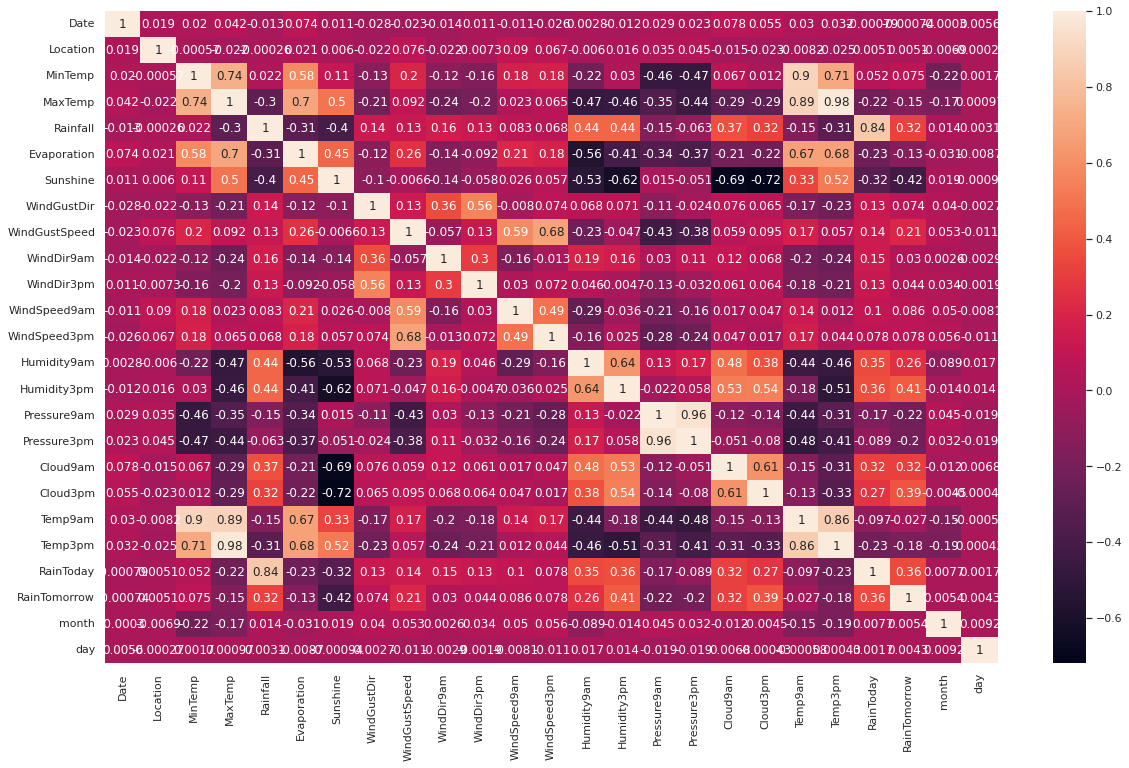

In [49]:
cor = df.corr(method='spearman')
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True)

#Peu de différence avec corrélation Spearman

In [50]:
cor['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.413889
Cloud3pm         0.385690
RainToday        0.355202
Rainfall         0.324782
Cloud9am         0.321309
Humidity9am      0.257074
WindGustSpeed    0.209190
WindSpeed9am     0.085877
WindSpeed3pm     0.078089
MinTemp          0.075465
WindGustDir      0.073634
WindDir3pm       0.044024
WindDir9am       0.030131
month            0.005438
Location         0.005064
day              0.004273
Date            -0.000737
Temp9am         -0.027096
Evaporation     -0.132364
MaxTemp         -0.151521
Temp3pm         -0.183485
Pressure3pm     -0.204366
Pressure9am     -0.224062
Sunshine        -0.423141
Name: RainTomorrow, dtype: float64

In [51]:
#Test de la corrélation de la variable cible avec le mois de l'année ==> Résultat final peu convainquant

dftest=df['RainTomorrow']

dftest=dftest[dftest!=2]

table = pd.crosstab(df['month'],dftest)


from scipy.stats import chi2_contingency

chi2_contingency(table)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, df.shape[0])


0.056145255980304065

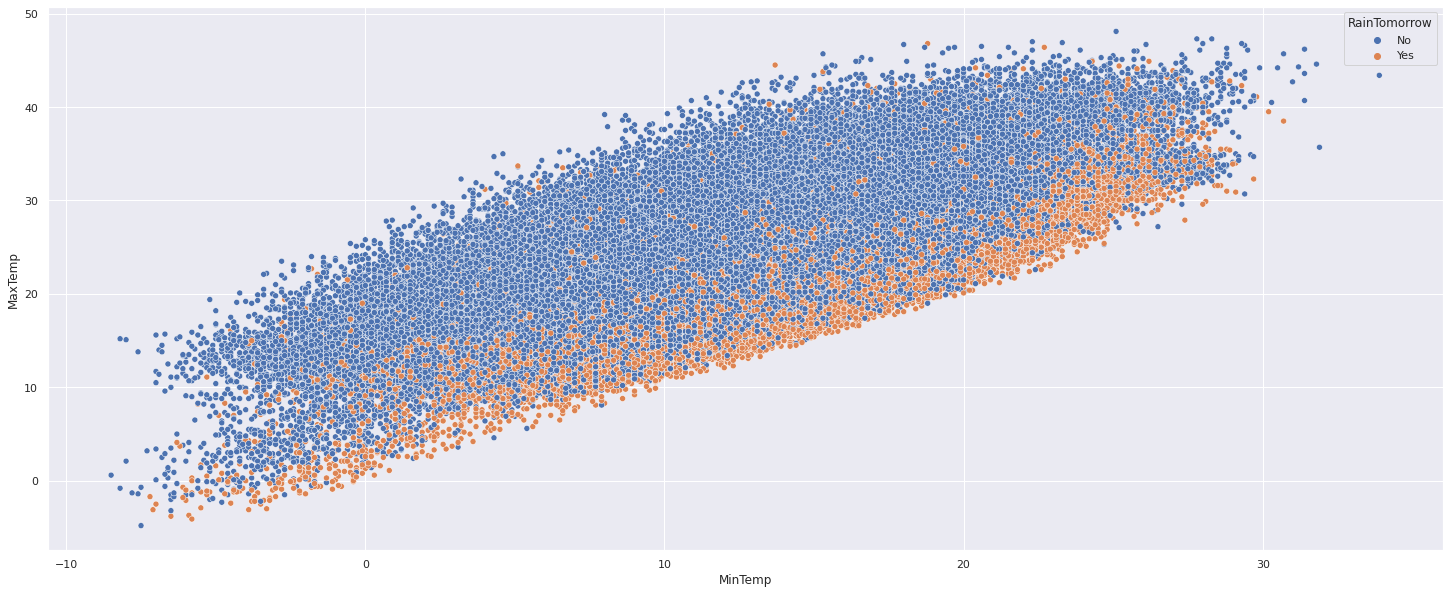

In [54]:
#Relation MinTemp et MaxTemp avec la variable cible 
# Droite y=x+10 a un sens physique ? Au dessus plutot pas de pluie, en dessous plutôt pluie

plt.figure(figsize=(25,10))
sns.scatterplot(data=df,x="MinTemp", y="MaxTemp", hue="RainTomorrow")



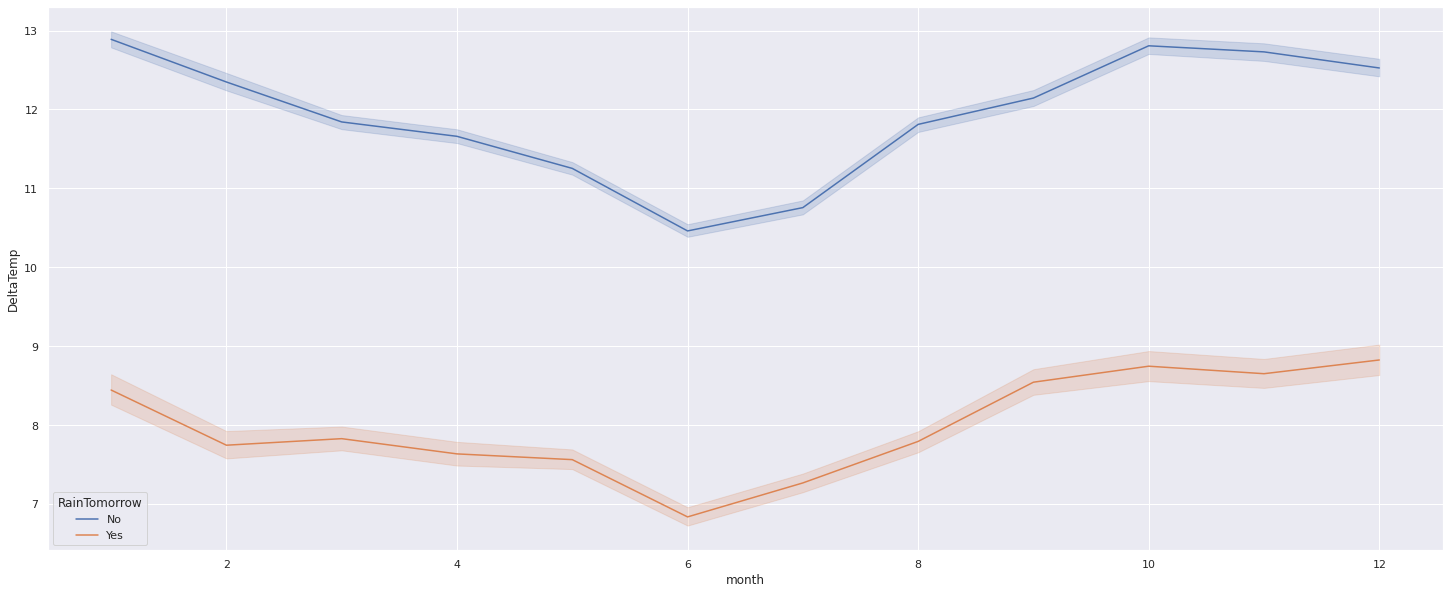

In [58]:
#Autre manière de montrer l'influence de Tmax et Tmin : vrai en moyenne

plt.figure(figsize=(25,10))


df["DeltaTemp"]=df["MaxTemp"]-df["MinTemp"]

sns.lineplot(x="month",y="DeltaTemp",hue="RainTomorrow",data=df)

#Les températures extrêmes influencent l'intensité des pluies https://www.futura-sciences.com/planete/actualites/meteorologie-temperatures-extremes-influencent-intensite-pluies-97956/  
#https://www.meteocontact.fr/pour-aller-plus-loin/les-precipitations

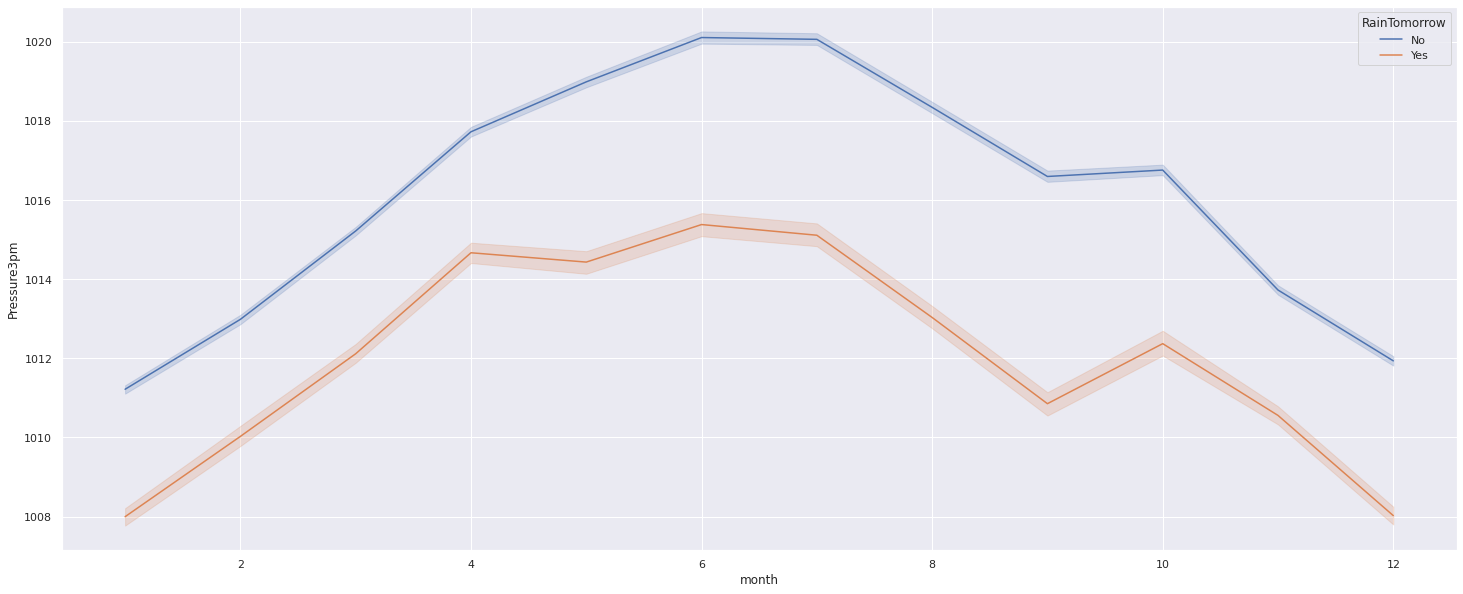

In [55]:
#Influence notable de la pression
plt.figure(figsize=(25,10))

sns.lineplot(x="month",y="Pressure3pm",hue="RainTomorrow",data=df)

plt.show()
 
#"le temps est à la pluie lorsque la pression est basse"  https://meteofrance.com/actualites-et-dossiers-0/comprendre-la-meteo/quest-ce-que-la-pression-atmospherique   

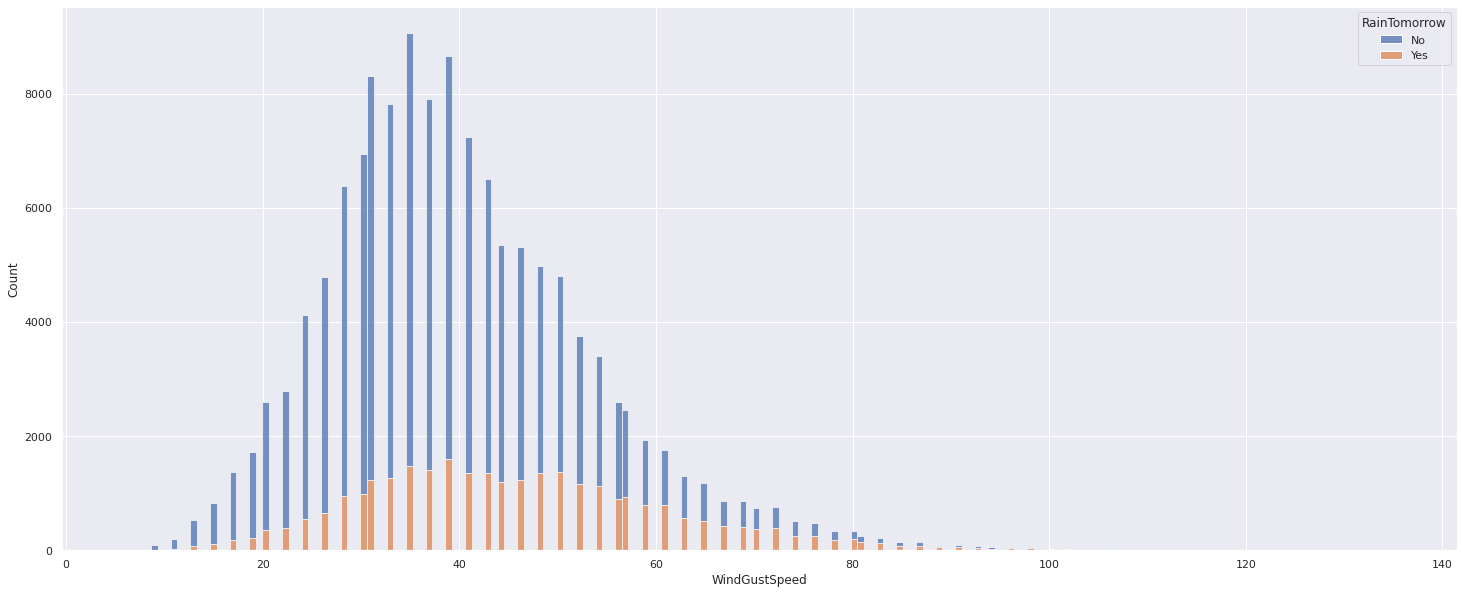

In [ ]:
plt.figure(figsize=(25,10))
sns.histplot(x="WindGustSpeed",hue="RainTomorrow",data=df,multiple="stack")

#PLus de vent, plus de risque de pluie ?

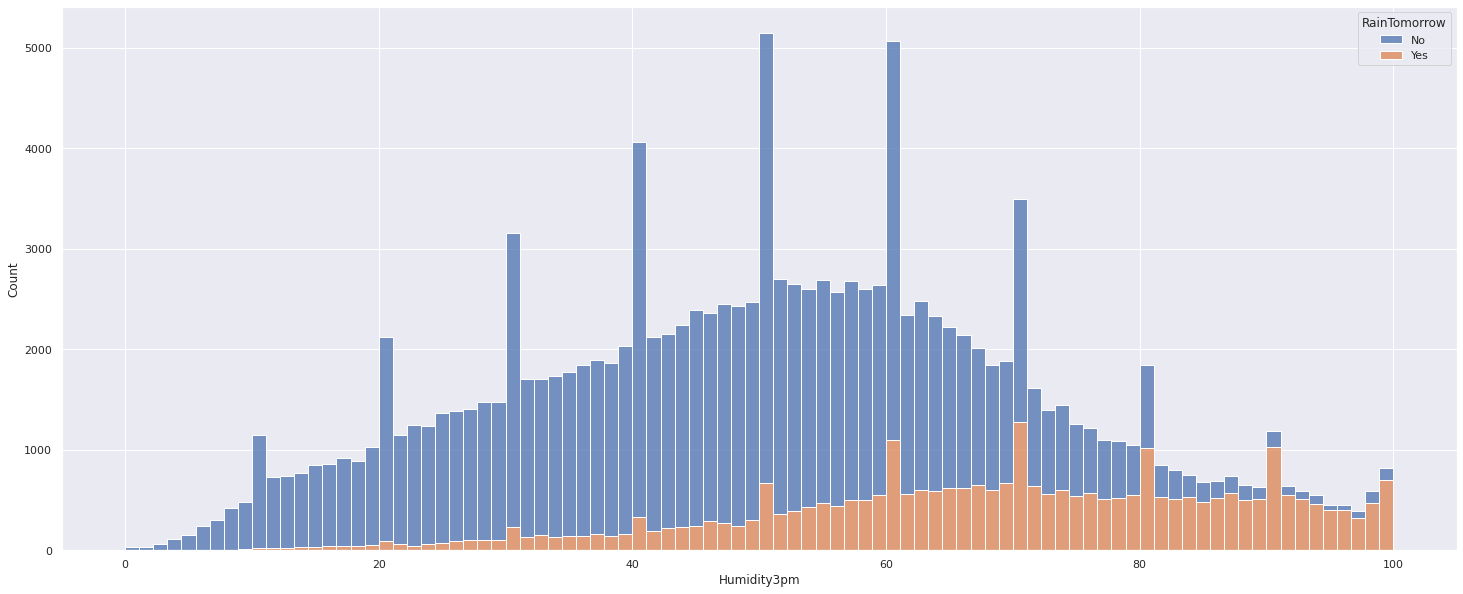

In [59]:
#Plus l'humidité augmentae, plus le risque de pluie aussi
#d'ou viennent les classes un peu aberrante
plt.figure(figsize=(25,10))
sns.histplot(x="Humidity3pm",hue="RainTomorrow",data=df,multiple="stack")

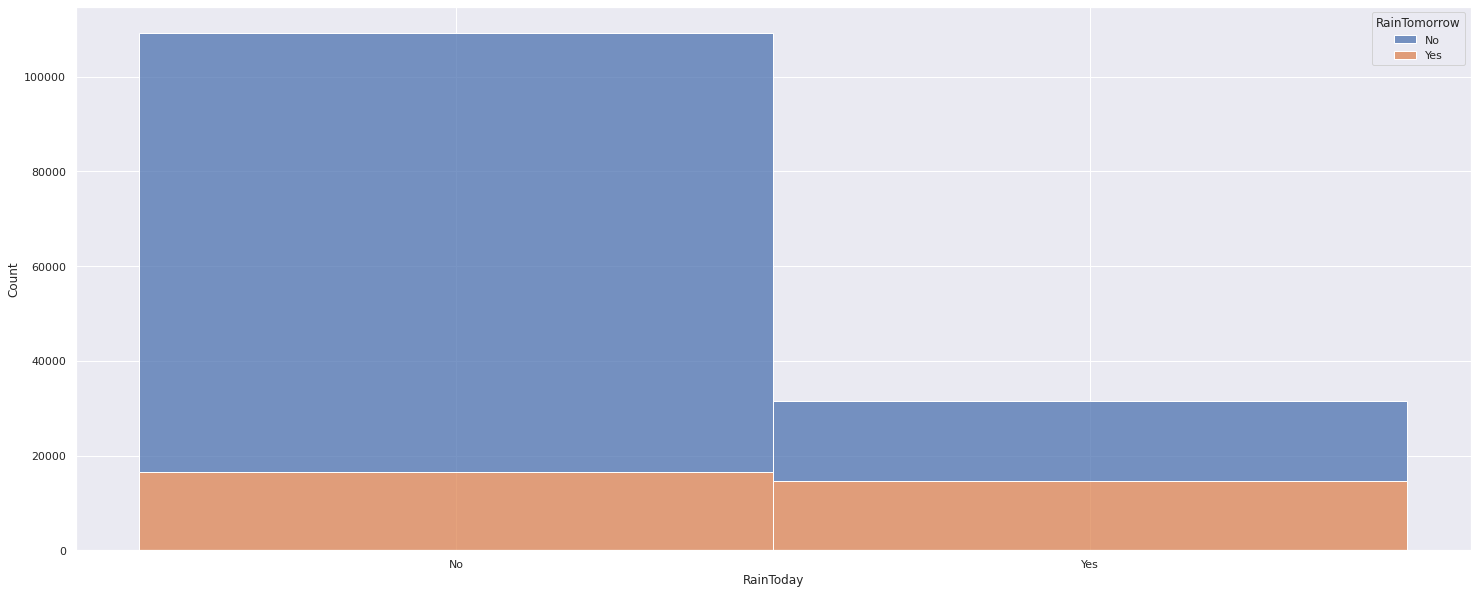

In [ ]:
#Grosse influence de RainToday sur RainTomorrow

plt.figure(figsize=(25,10))
sns.histplot(x="RainToday",hue="RainTomorrow",data=df,multiple="stack")